###**IMPORTING LIBRARIES AND PROJECT SETUP**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**STEP -1 : DATA COLLECTION**

In [ ]:
# Loads the dataset
# Please download the dataset and place it in the same directory or provide the full path
data = pd.read_csv('train.csv')

#**STEP -2 : DATA PRE-PROCESSING**

In [ ]:
# Checks for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handles missing values
# Fills missing 'Age' values with the median, and 'Embarked' with the most common value
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
# Drops 'Cabin' column due to too many missing values
data.drop(columns=['Cabin'], inplace=True)

#**STEP -3 : CORRELATION ANALYSIS**

In [ ]:
# Selects only numeric columns for correlation computation
numeric_data = data.select_dtypes(include=[float, int])

# Computes the correlation matrix
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


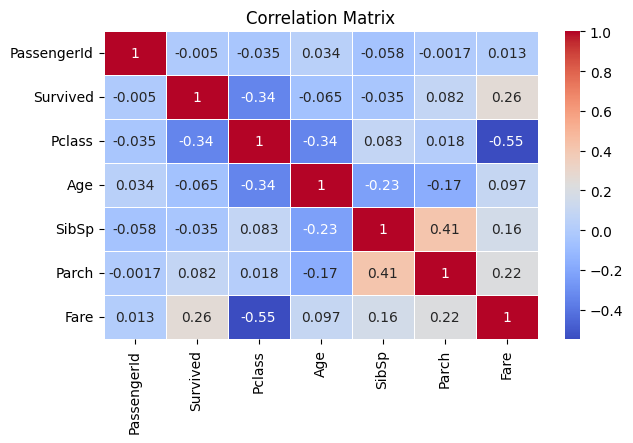

In [ ]:
# Plots the correlation matrix
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#**STEP -4 :  DATA DISTRIBUTION VISUALISATION**

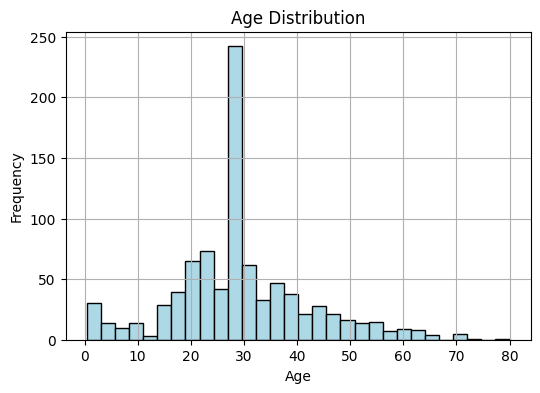

In [ ]:
# Shows data distribution using histograms
plt.figure(figsize=(6, 4))
data['Age'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

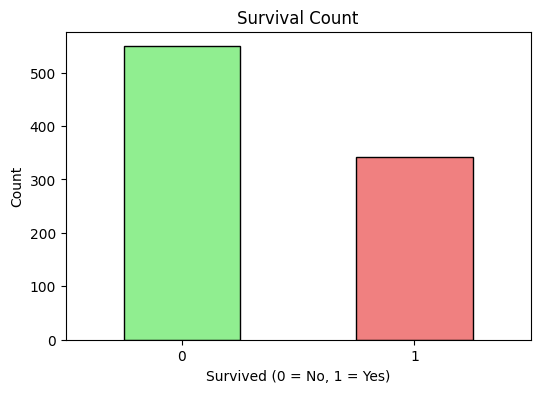

In [ ]:
# Shows data distribution using bar graphs
plt.figure(figsize=(6, 4))
data['Survived'].value_counts().plot(kind='bar', color=['lightgreen', 'lightcoral'], edgecolor='black')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#**STEP - 5 : FEATURES USING SCATTER PLOT**

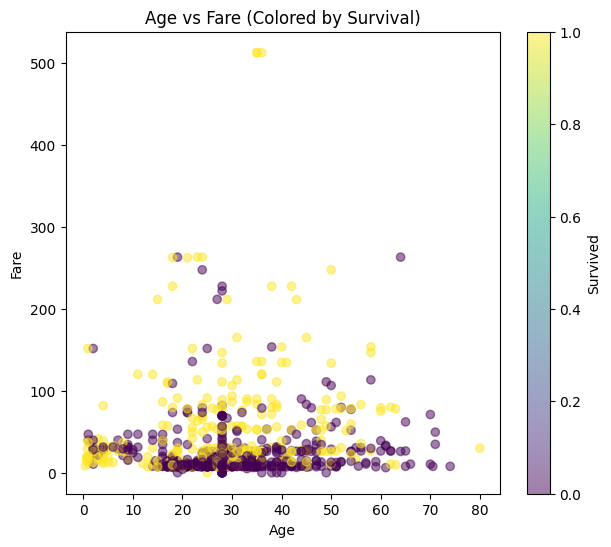

In [ ]:
# Shows relationship between Age and Fare
plt.figure(figsize=(7, 6))
plt.scatter(data['Age'], data['Fare'], alpha=0.5, c=data['Survived'], cmap='viridis')
plt.colorbar(label='Survived')
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

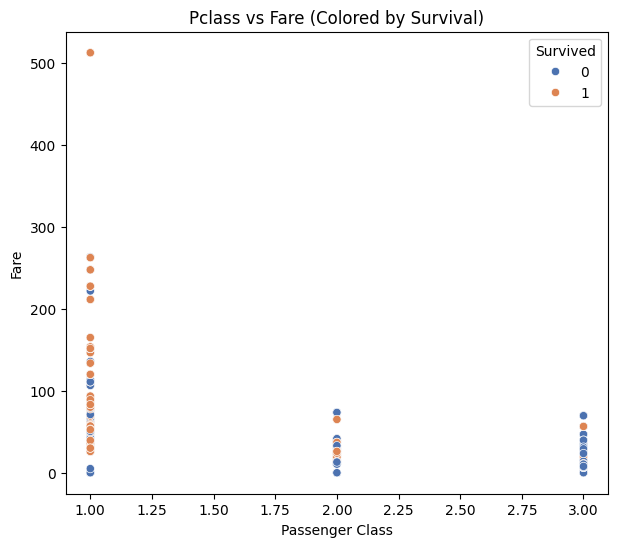

In [ ]:
# Additional Scatter Plot with Seaborn
# Shows relationship between Pclass and Fare
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=data, palette='deep')
plt.title('Pclass vs Fare (Colored by Survival)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()